In [1]:
import importlib
from source.morph import Morph
from source.models import Models
from source.tsmorph import TSmorph
import matplotlib.pyplot as plt
import numpy as np
from aeon.datasets import load_classification
from sklearn.preprocessing import LabelEncoder

from aeon.datasets import load_classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

start_color='#61E6AA'
end_color='#5722B1'

### Univariate Example: ECG200

X Shape: (200, 1, 96)


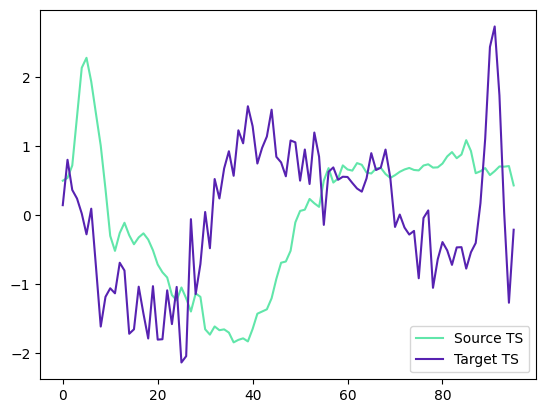

In [2]:
X, y = load_classification("ECG200")
le = LabelEncoder()
y = le.fit_transform(y)

print("X Shape:", X.shape)

S = np.array(X[0])
T = np.array(X[1])

plt.plot(S.T, color=start_color, label='Source TS')
plt.plot(T.T, color=end_color, label='Target TS')
plt.legend()
plt.show()

(12, 1, 96)


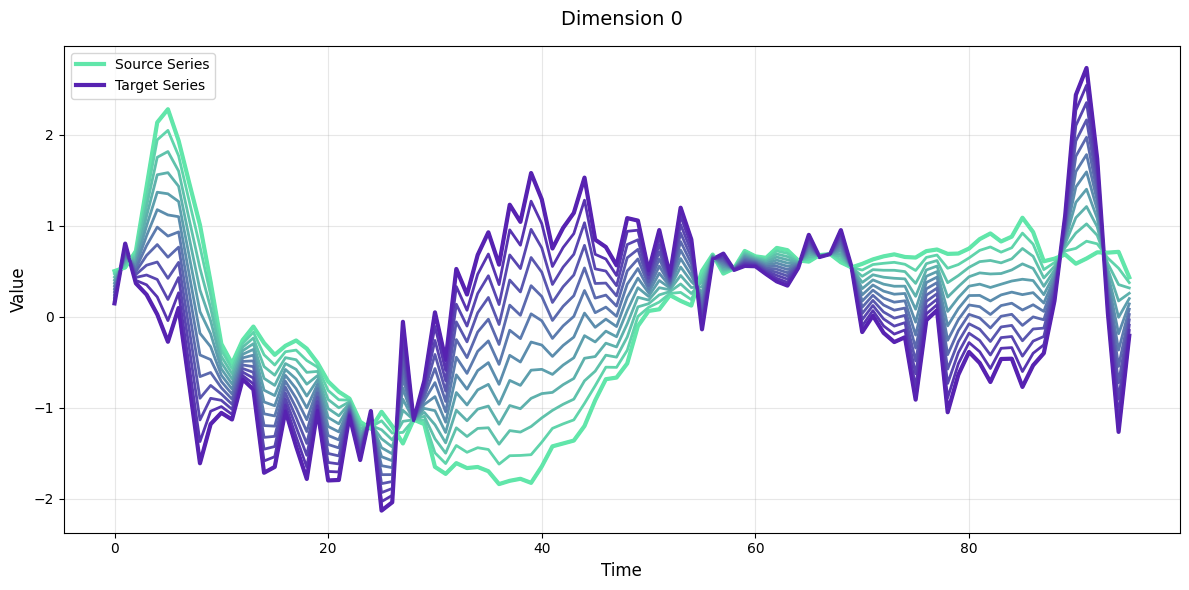

In [3]:
# Create TSmorph object
ts_morph = TSmorph(S, T, granularity=10)

# Perform morphing
morphed_series = ts_morph.transform()

print(morphed_series.shape)
ts_morph.plot_morphed_series(morphed_series)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lstm = Models('lstm', X_train, y_train)
lstm.train_lstm()
catch = Models('catch22', X_train, y_train)
catch.train_catch22()
rocket = Models('rocket', X_train, y_train)
rocket.train_rocket()

models = (lstm, catch, rocket)

c:\Users\anton\Desktop\Research\Morphing\source\models.py:152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
morph = Morph(X_test, y_test, target_class=np.unique(y_test)[0])
morph.get_DTWGlobalBorderline()

res = morph.Binary_MorphingCalculater(models)

100%|██████████| 35/35 [01:02<00:00,  1.78s/it]


In [6]:
print("lstm", res['lstm']['metrics'])
print("catch22", res['catch22']['metrics'])
print("rocket", res['rocket']['metrics'])

for m in models:
    print(m.model_name, 'accuracy: ')
    pred,_ = m.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(acc)

lstm {'mean': 0.43800000000000006, 'std': 0.07853661566428745}
catch22 {'mean': 0.33428571428571424, 'std': 0.1427142142141963}
rocket {'mean': 0.39151515151515154, 'std': 0.10000367302712655}
lstm accuracy: 
0.875
catch22 accuracy: 
0.775
rocket accuracy: 
0.925


### Multivariate Example: StandWalkJump

X Shape: (275, 3, 206)


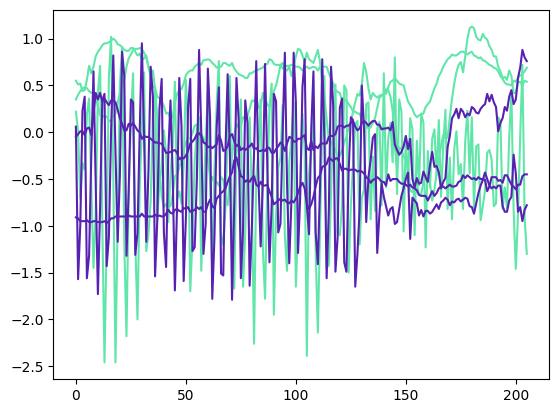

In [7]:
X, y = load_classification('Epilepsy')
le = LabelEncoder()
y = le.fit_transform(y)

print("X Shape:", X.shape)

S = np.array(X[0])
T = np.array(X[1])

plt.plot(S.T, color=start_color, label='Source TS')
plt.plot(T.T, color=end_color, label='Target TS')
plt.show()

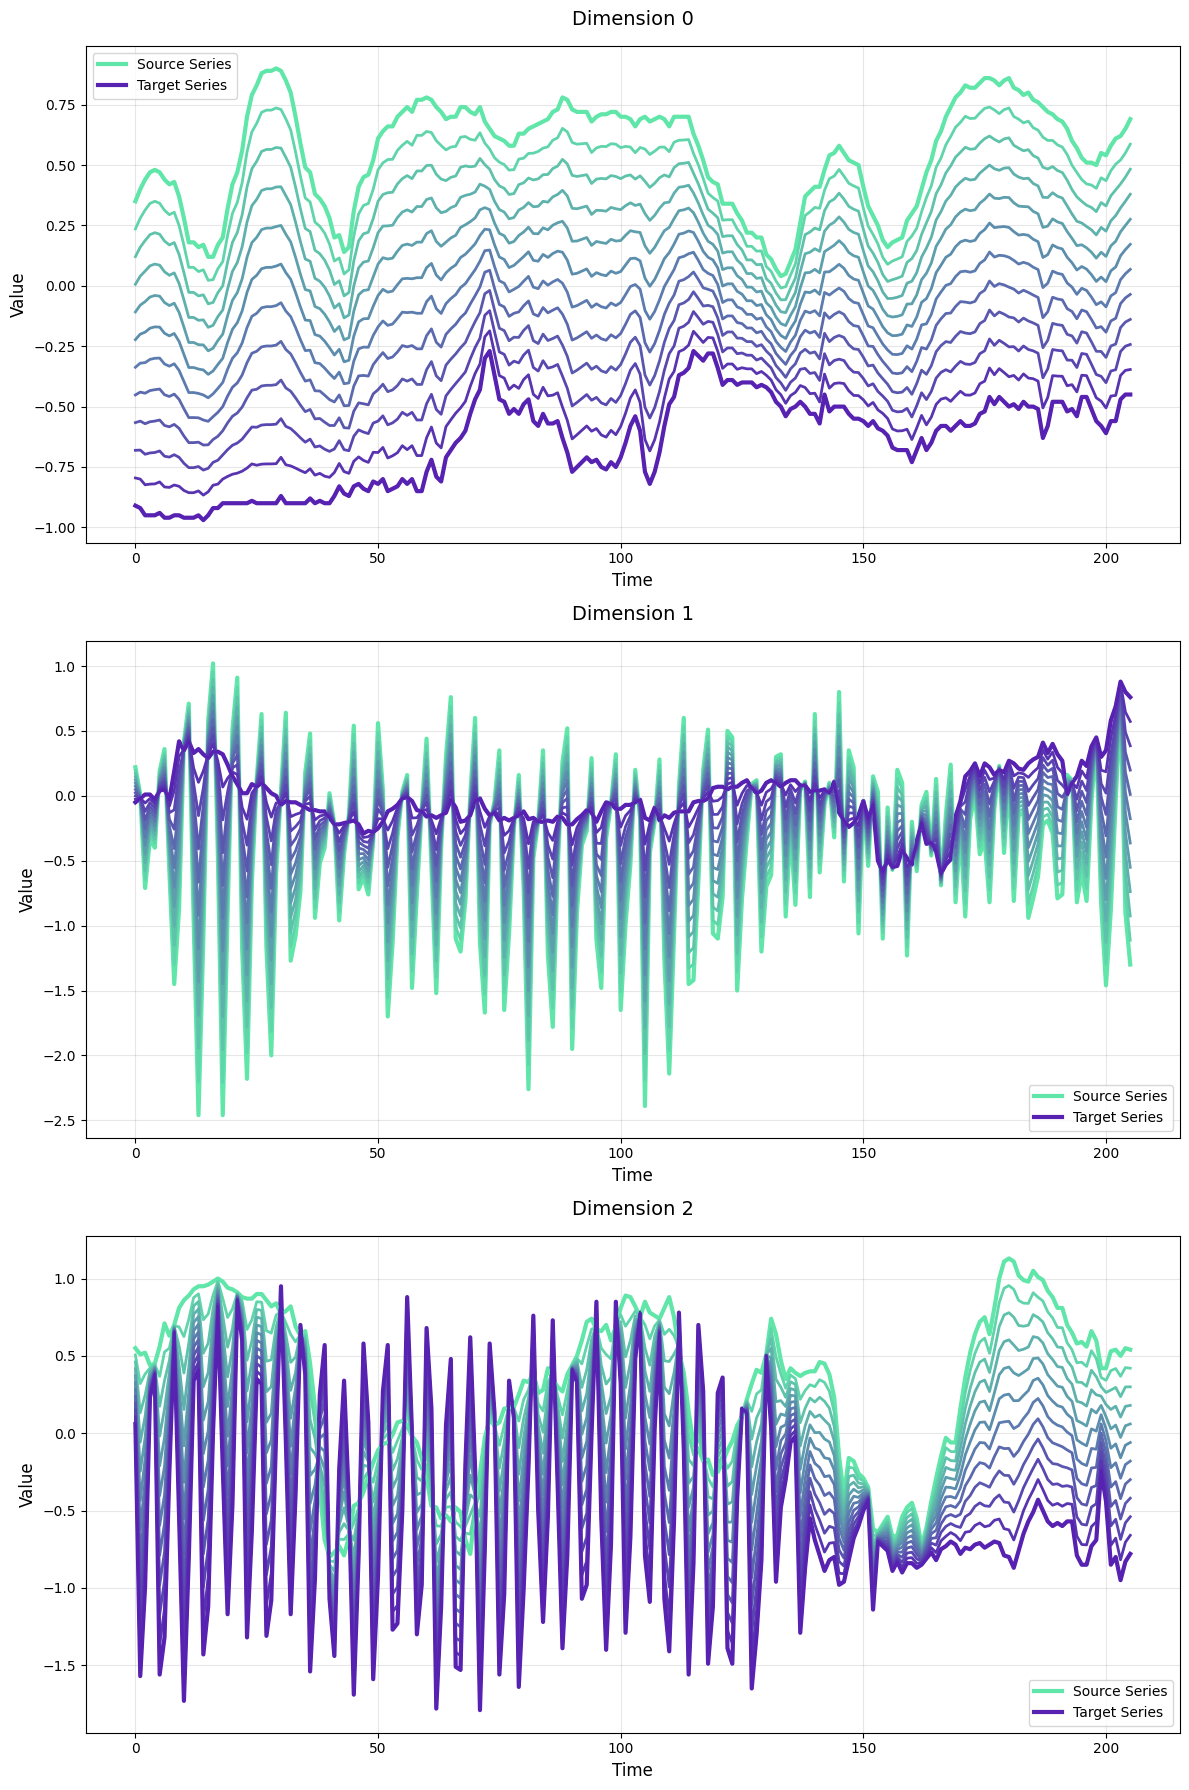

In [8]:
# Create TSmorph object
ts_morph = TSmorph(X[0], X[1], granularity=10)

# Perform morphing
morphed_series = ts_morph.transform()

# Plot the morphed series
ts_morph.plot_morphed_series(morphed_series)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lstm = Models('lstm', X_train, y_train)
lstm.train_lstm()
catch = Models('catch22', X_train, y_train)
catch.train_catch22()
rocket = Models('rocket', X_train, y_train)
rocket.train_rocket()

models = ([lstm, catch, rocket])

c:\Users\anton\Desktop\Research\Morphing\source\models.py:152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
morph = Morph(X_test, y_test, target_class=np.unique(y_test)[0])
morph.get_DTWGlobalBorderline()
 
res = morph.Binary_MorphingCalculater(models)

100%|██████████| 57/57 [06:35<00:00,  6.94s/it]


In [14]:
print("lstm",res['lstm']['metrics'])
print("catch22",res['catch22']['metrics'])
print("rocket",res['rocket']['metrics'])

for m in models:
    print(m.model_name, 'accuracy: ')
    pred,_ = m.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(acc)

lstm {'mean': 0.4316666666666667, 'std': 0.2355902752190289}
catch22 {'mean': 0.5828, 'std': 0.14687464042509177}
rocket {'mean': 0.5426530612244898, 'std': 0.23028620622248133}
lstm accuracy: 
0.7818181818181819
catch22 accuracy: 
0.9818181818181818
rocket accuracy: 
0.9818181818181818
